# LAB 9 - FEATURE ENGINEERING + REGULARIZATION

This lab is comprise of 2 main sections:

 - 1. EDA and Feature Engineering
 
 - 2. Regression Analysis and Regularization Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ames = pd.read_csv('Ames.csv')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2930 non-null   int64  
 1   MSZoning       2930 non-null   object 
 2   LotFrontage    2440 non-null   float64
 3   LotArea        2930 non-null   float64
 4   Street         2930 non-null   object 
 5   Alley          2930 non-null   object 
 6   LotShape       2930 non-null   object 
 7   LandContour    2930 non-null   object 
 8   Utilities      2930 non-null   object 
 9   LotConfig      2930 non-null   object 
 10  LandSlope      2930 non-null   object 
 11  Neighborhood   2930 non-null   object 
 12  Condition1     2930 non-null   object 
 13  Condition2     2930 non-null   object 
 14  BldgType       2930 non-null   object 
 15  HouseStyle     2930 non-null   object 
 16  OverallQual    2930 non-null   int64  
 17  OverallCond    2930 non-null   int64  
 18  YearBuil

# 1. EDA and Feature Engineering

First let's do some basic cleaning and exploratory analysis. We start by looking at the dependent variable

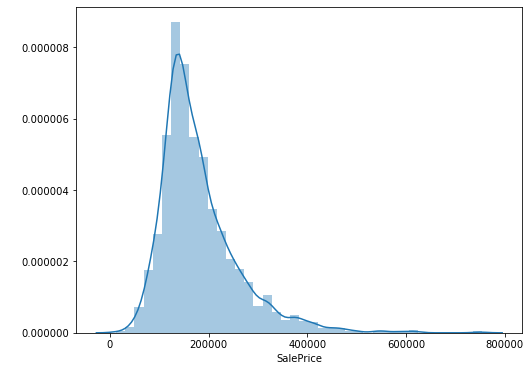

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3]:
plt.figure(figsize=(8,6))
ax = sns.distplot(ames['SalePrice'], bins=40)

plt.xlabel('SalePrice')
plt.ylabel(' ')

plt.show()
ames['SalePrice'].describe()

Let's take log to be more fair in comparing high vs. low price homes

In [4]:
ames['LogSalePrice'] = ames['SalePrice'].apply(np.log)
ames.drop(columns='SalePrice', inplace=True)

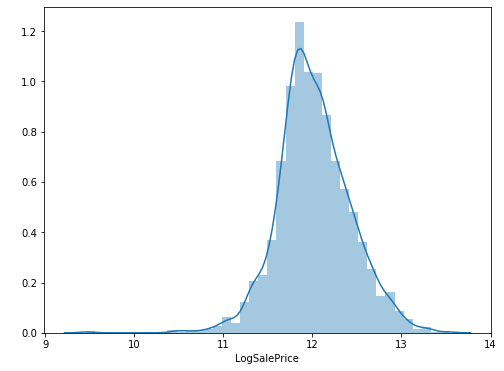

count    2930.000000
mean       12.020969
std         0.407587
min         9.456341
25%        11.771436
50%        11.982929
75%        12.271392
max        13.534473
Name: LogSalePrice, dtype: float64

In [5]:
plt.figure(figsize=(8,6))
ax = sns.distplot(ames['LogSalePrice'], bins=40)

plt.xlabel('LogSalePrice')
plt.ylabel(' ')

plt.show()
ames['LogSalePrice'].describe()

### Column Names

One of the column names contains a dot. We rename it to avoid problems:

In [6]:
ames.rename(columns={'YearRemod.Add':'YearRemodAdd'}, inplace=True)

### Encode Condition Variables

Convert condition variables into dummy variables. We want variables that are equal to 1 if the condition is satisfied, which is either the case if `Condition1` or `Condition2` has the corresponding value.

In [7]:
condition = ames[['Condition1', 'Condition2']]

ames['Artery'] = pd.Series([1 if (condition.iloc[i] == 'Artery').any() else 0 for i in range(len(condition))])
ames['Feedr'] = pd.Series([1 if (condition.iloc[i] == 'Feedr').any() else 0 for i in range(len(condition))])
ames['PosA'] = pd.Series([1 if (condition.iloc[i] == 'PosA').any() else 0 for i in range(len(condition))])
ames['PosB'] = pd.Series([1 if (condition.iloc[i] == 'PosB').any() else 0 for i in range(len(condition))])
ames['RRAe'] = pd.Series([1 if (condition.iloc[i] == 'RRAe').any() else 0 for i in range(len(condition))])
ames['RRAn'] = pd.Series([1 if (condition.iloc[i] == 'RRAn').any() else 0 for i in range(len(condition))])
ames['RRNn'] = pd.Series([1 if (condition.iloc[i] == 'RRNn').any() else 0 for i in range(len(condition))])
ames['RRNe'] = pd.Series([1 if (i == 'RRNe') else 0 for i in ames['Condition1']])

ames.drop(columns=['Condition1', 'Condition2'], inplace=True)

### Encode Exterior Variables

Same treatment as with condition variables

In [8]:
exterior = ames[['Exterior1st', 'Exterior2nd']]

ames['ExteriorAsbShng'] = pd.Series([1 if (exterior.iloc[i] == 'AsbShng').any() else 0 for i in range(len(exterior))])
ames['ExteriorAsphShn'] = pd.Series([1 if (exterior.iloc[i] == 'AsphShn').any() else 0 for i in range(len(exterior))])
ames['ExteriorBrkComm'] = pd.Series([1 if (exterior.iloc[i] == 'BrkComm').any() else 0 for i in range(len(exterior))])
ames['ExteriorBrkFace'] = pd.Series([1 if (exterior.iloc[i] == 'BrkFace').any() else 0 for i in range(len(exterior))])
ames['ExteriorCBlock'] = pd.Series([1 if (exterior.iloc[i] == 'CBlock').any() else 0 for i in range(len(exterior))])
ames['ExteriorCemntBd'] = pd.Series([1 if (exterior.iloc[i] == 'CemntBd').any() else 0 for i in range(len(exterior))])
ames['ExteriorHdBoard'] = pd.Series([1 if (exterior.iloc[i] == 'HdBoard').any() else 0 for i in range(len(exterior))])
ames['ExteriorImStucc'] = pd.Series([1 if (exterior.iloc[i] == 'ImStucc').any() else 0 for i in range(len(exterior))])
ames['ExteriorMetalSd'] = pd.Series([1 if (exterior.iloc[i] == 'MetalSd').any() else 0 for i in range(len(exterior))])
ames['ExteriorPlywood'] = pd.Series([1 if (exterior.iloc[i] == 'Plywood').any() else 0 for i in range(len(exterior))])
ames['ExteriorPreCast'] = pd.Series([1 if (exterior.iloc[i] == 'PreCast').any() else 0 for i in range(len(exterior))])
ames['ExteriorStone'] = pd.Series([1 if (exterior.iloc[i] == 'Stone').any() else 0 for i in range(len(exterior))])
ames['ExteriorStucco'] = pd.Series([1 if (exterior.iloc[i] == 'Stucco').any() else 0 for i in range(len(exterior))])
ames['ExteriorVinylSd'] = pd.Series([1 if (exterior.iloc[i] == 'VinylSd').any() else 0 for i in range(len(exterior))])
ames['ExteriorWdSdng'] = pd.Series([1 if (exterior.iloc[i] == 'Wd Sdng').any() else 0 for i in range(len(exterior))])
ames['ExteriorWdShing'] = pd.Series([1 if (exterior.iloc[i] == 'WdShing').any() else 0 for i in range(len(exterior))])
ames['ExteriorOther'] = pd.Series([1 if (i == 'AsbShng') else 0 for i in ames['Exterior2nd']])


ames.drop(columns=['Exterior1st', 'Exterior2nd'], inplace=True)

### Encode Quality Variables

Let's look at the overall quality/condition variables.

In [9]:
# ames %>% ggplot(aes(x = as.factor(OverallQual), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(OverallCond), y = LogSalePrice)) + geom_boxplot()

Let's encode them to categorical:

In [10]:
# ames_not_encoded = ames.copy() # let's keep a non-encoded copy for later purposes

# ames = pd.get_dummies(ames, columns=['OverallQual', 'OverallCond'])

### Create New Features for Year Built & Year Remodeled

Let's see how sale price is affected by the year built and the year remodeled.

In [11]:
print(ames['YearBuilt'].describe(), '\n')
print(ames['YearRemodAdd'].describe())

count    2930.000000
mean     1971.356314
std        30.245361
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64 

count    2930.000000
mean     1984.266553
std        20.860286
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


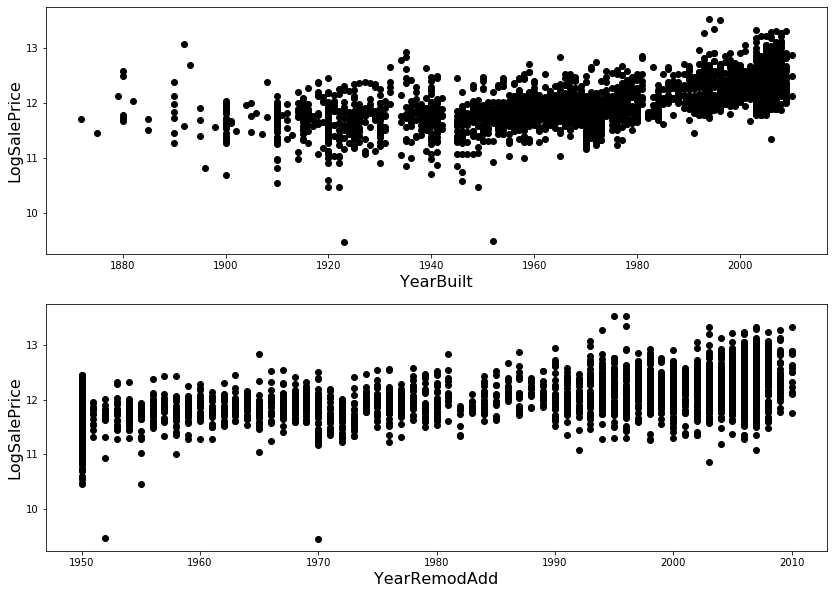

In [12]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
# plt.plot(ames['YearBuilt'], ames['LogSalePrice'], color='black')  
plt.scatter(ames['YearBuilt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['YearRemodAdd'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearRemodAdd', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)
plt.show()

Let's add features:
* `YearsSince1950Built` -- number of years after 1950 that the home was built (if before 1950, set to 0)
* `YearsSince1950Remod` -- number of years after 1950 that the home was remodeled

In [13]:
ames['YearsSince1950Built'] = pd.Series([(x - 1950) if (x > 1950) else 0 for x in ames['YearBuilt']])
ames['YearsSince1950Remod'] = pd.Series([(x - 1950) for x in ames['YearRemodAdd']])

ames.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)

### Remove Outliers and Mistakes

Text(0, 0.5, 'LogSalePrice')

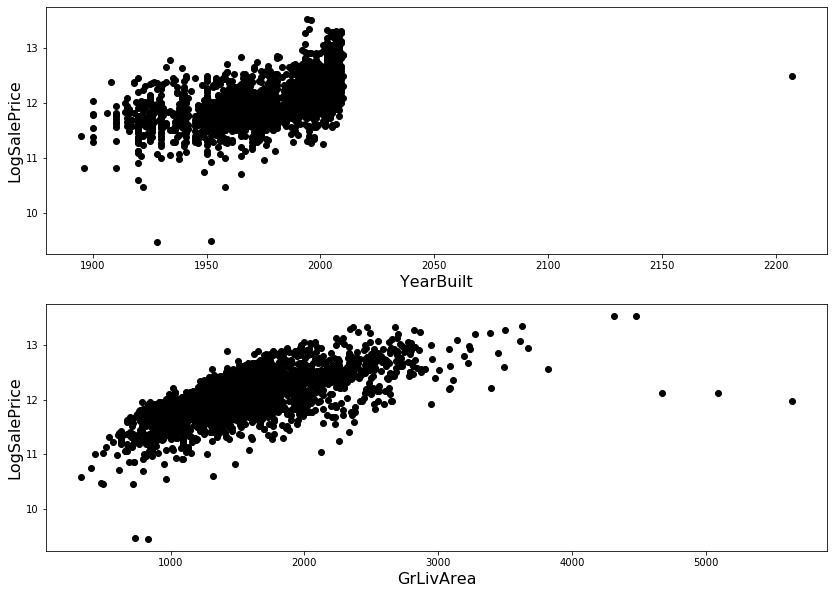

In [14]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.scatter(ames['GarageYrBlt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['GrLivArea'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('GrLivArea', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

Throw away outliers and mistakes:

In [15]:
ames['GarageYrBlt'] = pd.Series([np.NaN if (x > 2015) else x for x in ames['GarageYrBlt']])
ames['GrLivArea'] = pd.Series([np.NaN if (x > 4000) else x for x in ames['GrLivArea']])

Text(0, 0.5, 'LogSalePrice')

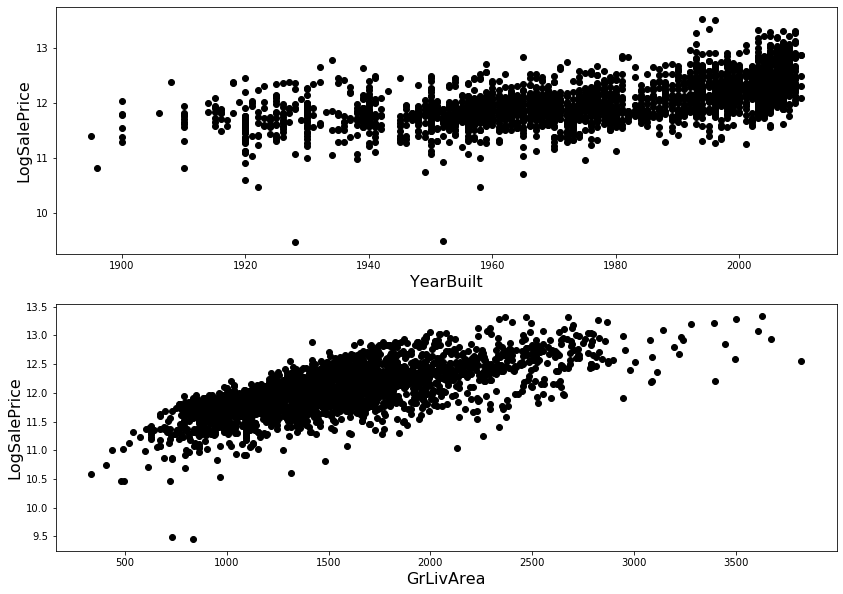

In [16]:
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.scatter(ames['GarageYrBlt'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('YearBuilt', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

plt.subplot(2,1,2)
plt.scatter(ames['GrLivArea'].to_numpy(), ames['LogSalePrice'].to_numpy(), color='black')  
plt.xlabel('GrLivArea', fontsize=16)
plt.ylabel('LogSalePrice', fontsize=16)

Let's apply the same 1950 transformation to `GarageYrBlt`.

In [17]:
ames['YearsSince1950GarageBuilt'] = pd.Series([(x - 1950) if (x > 1950) else 0 for x in ames['GarageYrBlt']])
ames.drop(columns=['GarageYrBlt'], inplace=True)

### Encode Time Sold

Investigate further the time when the house was sold:

In [18]:
# ames %>% ggplot(aes(x = YrSold)) + geom_bar() + xlab("Year Sold")
# ames %>% ggplot(aes(x = YrSold, y = LogSalePrice)) + xlab("Year Sold") + ylab("Log(Sale Price)") + geom_boxplot()
# ames %>% ggplot(aes(x = MoSold, y = LogSalePrice)) + geom_boxplot()

Convert `YrSold` and `MoSold` variables to categoricals:

In [19]:
ames = pd.get_dummies(ames, columns=['YrSold', 'MoSold'])

### Encode Quality Variables

Let's look at the overall quality/condition variables.

In [20]:
# ames %>% ggplot(aes(x = as.factor(OverallQual), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(OverallCond), y = LogSalePrice)) + geom_boxplot()

Let's encode them to categorical:

In [21]:
ames_not_encoded = ames.copy() # Let's keep a non-encoded copy for later purposes. 'OverallQual' in it's original format might prove useful later on

ames = pd.get_dummies(ames, columns=['OverallQual', 'OverallCond'])

### Handling NaN Values

In [22]:
cols = np.sum(ames.isnull())
NA = cols[cols>0]
print(NA)

LotFrontage     490
MasVnrType       23
MasVnrArea       23
BsmtQual          1
BsmtCond          1
BsmtExposure      4
BsmtFinType1      1
BsmtFinSF1        1
BsmtFinType2      2
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
GrLivArea         5
BsmtFullBath      2
BsmtHalfBath      2
GarageFinish      2
GarageCars        1
GarageArea        1
GarageQual        1
GarageCond        1
dtype: int64


In [23]:
print(NA.index.to_numpy())

['LotFrontage' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' 'Electrical' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond']


Dealing with NA columns:

* For numerical variables, NAs arise because some factor is already set to 0 (i.e, there is no basement), so we convert NAs to 0.

* For categorical variables, we add a new level corresponding to whether the variable is missing from that observation. We'll do this via dummy encoding as usual.


In [24]:
ames['LotFrontage'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['LotFrontage']])
# MasVnrType (categorical)
ames['MasVnrArea'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['MasVnrArea']])
# BsmtQual (categorical)
# BsmtCond (categorical)
# BsmtExposure (categorical)
# BsmtFinType1 (categorical)
# BsmtFinType2 (categorical)
ames['BsmtFinSF1'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtFinSF1']])
ames['BsmtFinSF2'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtFinSF2']])
ames['BsmtUnfSF'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtUnfSF']])
ames['TotalBsmtSF'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['TotalBsmtSF']])
# Electrical (categorical)
ames['BsmtFullBath'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtFullBath']])
ames['BsmtHalfBath'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['BsmtHalfBath']])
# GarageFinish (categorical)
ames['GarageCars'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['GarageCars']])
ames['GarageArea'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['GarageArea']])
# GarageQual (categorical)
# GarageCond (categorical)

ames['GrLivArea'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['GrLivArea']])
ames['YearsSince1950GarageBuilt'] = pd.Series([x if (np.isnan(x) == False) else 0 for x in ames['YearsSince1950GarageBuilt']])

In [25]:
categorical_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'Electrical', 'GarageFinish', 'GarageQual', 'GarageCond']
ames = pd.get_dummies(ames, columns=categorical_cols, dummy_na=True)

In [26]:
print(np.sum(ames.isnull().any()))

0


### Some More EDA

In [27]:
# Let's look at plots of some continuous variables vs. LogSalePrice.

# ```{r,  message=FALSE, warning=FALSE}
# ames %>% ggplot(aes(x = LotFrontage, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = LotArea, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = MasVnrArea, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = TotalBsmtSF, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = X1stFlrSF, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = X2ndFlrSF, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = PoolArea, y = LogSalePrice)) + geom_point()
# ames %>% ggplot(aes(x = GarageArea, y = LogSalePrice)) + geom_point()
# ```

# Smoothed versions of those plots.

# ```{r,  message=FALSE, warning=FALSE}
# ames %>% ggplot(aes(x = LotFrontage, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = LotArea, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = MasVnrArea, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = TotalBsmtSF, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = X1stFlrSF, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = X2ndFlrSF, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = PoolArea, y = LogSalePrice)) + geom_smooth()
# ames %>% ggplot(aes(x = GarageArea, y = LogSalePrice)) + geom_smooth()
# ```

# It appears that there are nonlinear relationships. Later, we will use polynomials to enhance our models. 

### Discrete Variables

Let's look at discrete variables now.

In [28]:
# ames %>% ggplot(aes(x = as.factor(BsmtFullBath), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(BsmtHalfBath), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(FullBath), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(HalfBath), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(BedroomAbvGr), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(KitchenAbvGr), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(TotRmsAbvGrd), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(Fireplaces), y = LogSalePrice)) + geom_boxplot()
# ames %>% ggplot(aes(x = as.factor(GarageCars), y = LogSalePrice)) + geom_boxplot()

Let's convert those all to factors.

In [29]:
discrete_cols = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSSubClass']

ames = pd.get_dummies(ames, columns=discrete_cols)

### Other Categorical Variables

We still have many columns that are categorical. We must encode them before passing them to our models

In [30]:
still_categorical = ames.columns[ames.dtypes == 'object']
for col in still_categorical:
    print(col, ':\n', ames[col].unique())

MSZoning :
 ['RL' 'RH' 'FV' 'RM' 'C' 'I' 'A']
Street :
 ['Pave' 'Grvl']
Alley :
 ['NoAccess' 'Pave' 'Grvl']
LotShape :
 ['IR1' 'Reg' 'IR2' 'IR3']
LandContour :
 ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities :
 ['AllPub' 'NoSewr' 'NoSeWa']
LotConfig :
 ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
LandSlope :
 ['Gtl' 'Mod' 'Sev']
Neighborhood :
 ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
BldgType :
 ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle :
 ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
RoofStyle :
 ['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat']
RoofMatl :
 ['CompShg' 'WdShake' 'Tar&Grv' 'WdShngl' 'Membran' 'ClyTile' 'Roll'
 'Metal']
ExterQual :
 ['TA' 'Gd' 'Ex' 'Fa']
ExterCond :
 ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation :
 ['CBlock

In [31]:
ames = pd.get_dummies(ames, columns=still_categorical)
ames.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,LogSalePrice,Artery,Feedr,PosA,PosB,RRAe,RRAn,RRNn,RRNe,ExteriorAsbShng,ExteriorAsphShn,ExteriorBrkComm,ExteriorBrkFace,ExteriorCBlock,ExteriorCemntBd,ExteriorHdBoard,ExteriorImStucc,ExteriorMetalSd,ExteriorPlywood,ExteriorPreCast,ExteriorStone,ExteriorStucco,ExteriorVinylSd,ExteriorWdSdng,ExteriorWdShing,ExteriorOther,YearsSince1950Built,YearsSince1950Remod,YearsSince1950GarageBuilt,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,YrSold_2010.0,MoSold_1.0,MoSold_2.0,MoSold_3.0,MoSold_4.0,MoSold_5.0,MoSold_6.0,MoSold_7.0,MoSold_8.0,MoSold_9.0,MoSold_10.0,MoSold_11.0,MoSold_12.0,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_Po,BsmtQual_TA,BsmtQual_nan,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,...,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePlace,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_Elev,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,141.0,31770.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,12.278393,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,10.0,10.0,10.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,11622.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,11.561716,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11.0,11.0,11.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,81.0,14267.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,12.055250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.0,8.0,8.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0

## 2. Regression Analysis and Regularization Methods

### Helper Functions

In [32]:
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [33]:
def MAE(y_test, y_pred):
    
    return (np.mean(abs(y_test - y_pred)))

In [34]:
def RMSE(y_test, y_pred):
    
    return np.sqrt(np.mean((y_test - y_pred)**2))

In [35]:
def print_metrics(model, X_train, y_train, X_test, y_test, flag_log_sale_price=False):

    if (flag_log_sale_price == True):
        
        y_pred_train = pd.Series(model.predict(X_train)).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).reset_index(drop=True)
        y_train = y_train.copy().reset_index(drop=True)
        y_test = y_test.copy().reset_index(drop=True)
        
        print("\nMetrics for Log(Sale Price):\n")
        
    elif (flag_log_sale_price == False):
        
        y_pred_train = pd.Series(model.predict(X_train)).apply(np.exp).reset_index(drop=True)
        y_pred_test = pd.Series(model.predict(X_test)).apply(np.exp).reset_index(drop=True)
        y_train = y_train.copy().apply(np.exp).reset_index(drop=True)
        y_test = y_test.copy().apply(np.exp).reset_index(drop=True)
        
        print("\nMetrics for Sale Price:\n")

    print('Training R2', OSR2(y_train, y_train, y_pred_train))
    print('Training MAE', MAE(y_train, y_pred_train))
    print('Training RMSE', RMSE(y_train, y_pred_train))

    print('Out-of-sample R2', OSR2(y_train, y_test, y_pred_test))
    print('Out-of-sample MAE', MAE(y_test, y_pred_test))
    print('Out-of-sample RMSE', RMSE(y_test, y_pred_test))
    
    return None

### Sequential Split

In [36]:
# ames %>% ggplot(aes(x = YrSold)) + geom_bar()

In [37]:
ames_train = ames[(ames['YrSold_2006.0'] == 1) | (ames['YrSold_2007.0'] == 1) | (ames['YrSold_2008.0'] == 1)]
ames_test = ames[(ames['YrSold_2009.0'] == 1) | (ames['YrSold_2010.0'] == 1)]

print(ames.shape, ames_train.shape, ames_test.shape)

(2930, 394) (1941, 394) (989, 394)


In [38]:
y_train = ames_train['LogSalePrice']
y_test = ames_test['LogSalePrice']

X_train = ames_train.drop(columns='LogSalePrice')
X_test = ames_test.drop(columns='LogSalePrice')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1941, 393) (1941,) (989, 393) (989,)


### Higher-order Variables

We can construct features using a polynomial transformation. This will be especially relevant with the regularization methods that we will use, as redundat features will be smartly* discarded from the model. <- improve this sentence


In [39]:
def create_polynomial_features(df, n_degree):

    new_df = None
    
    for i in range(2, n_degree+1):
        
        tmp = df.pow(i)
        
        affix = '_pow_'+str(i)
        tmp.columns = list(map(lambda x: x + affix, df.columns))
        
        if new_df is not None:
            new_df = pd.concat([new_df, tmp], axis=1)
        else:
            new_df = tmp
    
    return new_df

<span style='color:blue'>
    
NOTE: An important consideration when creating higher-order variables is that the resulting features will tend to have some degree of linear dependence amongst themselves. This is normal as several new features are based on their zero-th power peer. Such correlation can also yield a high degree of multicollinearity in the regression models. The `sklearn` implementations that we will be using do not automatically account for this phenomenon, therefore we must be careful in selection the `n_degree`, and analyzing the model fit. 

</span>

In [40]:
poly_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'MiscVal', 'YearsSince1950Built',
             'YearsSince1950Remod', 'YearsSince1950GarageBuilt']

In [41]:
n_degree = 3

X_train_poly = pd.concat([X_train, create_polynomial_features(X_train[poly_cols], n_degree)], axis=1)
X_test_poly = pd.concat([X_test, create_polynomial_features(X_test[poly_cols], n_degree)], axis=1)

print(X_train.shape, X_test.shape)
print(create_polynomial_features(X_train[poly_cols], n_degree).shape, 
      create_polynomial_features(X_test[poly_cols], n_degree).shape)
print(X_train_poly.shape, X_test_poly.shape)

(1941, 393) (989, 393)
(1941, 42) (989, 42)
(1941, 435) (989, 435)


## Naive Linear Regression

In [42]:
import statsmodels.api as sm

X_train_nlr = sm.add_constant(X_train_poly, prepend=True, has_constant='add')
X_test_nlr = sm.add_constant(X_test_poly, prepend=True, has_constant='add')

nlr = sm.OLS(y_train, X_train_nlr).fit()

print(nlr.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     347.6
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:22:52   Log-Likelihood:                 1347.6
No. Observations:                1941   AIC:                            -2583.
Df Residuals:                    1885   BIC:                            -2271.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [43]:
print_metrics(nlr, X_train_nlr, y_train, X_test_nlr, y_test, flag_log_sale_price = True)
print_metrics(nlr, X_train_nlr, y_train, X_test_nlr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9102473526429232
Training MAE 0.08682145551863385
Training RMSE 0.12084838135418441
Out-of-sample R2 0.451058929928294
Out-of-sample MAE 0.2779565691770124
Out-of-sample RMSE 0.3080143585436843

Metrics for Sale Price:

Training R2 0.9128934975479337
Training MAE 15646.420976634368
Training RMSE 23725.08550890924
Out-of-sample R2 0.5657817371020222
Out-of-sample MAE 43255.77293709845
Out-of-sample RMSE 51981.224969528404


## "Common Sense" Linear Regression

We want to perform linear regression with only some of the variables which could be chosen using common sense

In [44]:
def get_columns_startswith(df, column_start_string):

    cols_startswith = []

    for i in column_start_string:
        for j in df:
            if j.startswith(i):  
                cols_startswith.append(j) 

    return cols_startswith

In [45]:
common_sense_cols = ['MSSubClass', 'OverallQual', 'YearsSince1950Built',
                     'GrLivArea', 'TotRmsAbvGrd','FullBath', 'SaleCondition']
    
common_sense_cols = get_columns_startswith(X_train, column_start_string=common_sense_cols)
common_sense_cols

['MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'OverallQual_1',
 'OverallQual_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'YearsSince1950Built',
 'GrLivArea',
 'TotRmsAbvGrd_2.0',
 'TotRmsAbvGrd_3.0',
 'TotRmsAbvGrd_4.0',
 'TotRmsAbvGrd_5.0',
 'TotRmsAbvGrd_6.0',
 'TotRmsAbvGrd_7.0',
 'TotRmsAbvGrd_8.0',
 'TotRmsAbvGrd_9.0',
 'TotRmsAbvGrd_10.0',
 'TotRmsAbvGrd_11.0',
 'TotRmsAbvGrd_12.0',
 'TotRmsAbvGrd_13.0',
 'TotRmsAbvGrd_14.0',
 'TotRmsAbvGrd_15.0',
 'FullBath_0.0',
 'FullBath_1.0',
 'FullBath_2.0',
 'FullBath_3.0',
 'FullBath_4.0',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 

However, some of these include categorical columns which we would prefer to analyze as numerical variables!

`OverallQual`
`TotRmsAbvGrd`
`FullBath`

In [46]:
to_numeric_cols = ['OverallQual', 'TotRmsAbvGrd', 'FullBath']

to_numeric_cols = get_columns_startswith(X_train, to_numeric_cols)
to_numeric_cols

['OverallQual_1',
 'OverallQual_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'TotRmsAbvGrd_2.0',
 'TotRmsAbvGrd_3.0',
 'TotRmsAbvGrd_4.0',
 'TotRmsAbvGrd_5.0',
 'TotRmsAbvGrd_6.0',
 'TotRmsAbvGrd_7.0',
 'TotRmsAbvGrd_8.0',
 'TotRmsAbvGrd_9.0',
 'TotRmsAbvGrd_10.0',
 'TotRmsAbvGrd_11.0',
 'TotRmsAbvGrd_12.0',
 'TotRmsAbvGrd_13.0',
 'TotRmsAbvGrd_14.0',
 'TotRmsAbvGrd_15.0',
 'FullBath_0.0',
 'FullBath_1.0',
 'FullBath_2.0',
 'FullBath_3.0',
 'FullBath_4.0']

Luckily we kept a non-encoded version of these variables in `ames_not_encoded`. The row ordering and preprocessing since then has been respected, therefore we shouldn't expect issues in using the data from this old dataframe.

Rather than reversing the dummy encoding, we can simplify our lives by using the old data and performing the train-test split on them again.

In [47]:
X_train_not_encoded = ames_not_encoded[(ames_not_encoded['YrSold_2006.0'] == 1) | (ames_not_encoded['YrSold_2007.0'] == 1) | (ames_not_encoded['YrSold_2008.0'] == 1)]
X_train_tnc = X_train_not_encoded[['OverallQual', 'TotRmsAbvGrd', 'FullBath']]

X_test_not_encoded = ames_not_encoded[(ames_not_encoded['YrSold_2009.0'] == 1) | (ames_not_encoded['YrSold_2010.0'] == 1)]
X_test_tnc = X_test_not_encoded[['OverallQual', 'TotRmsAbvGrd', 'FullBath']]

print(X_train_tnc.shape, X_test_tnc.shape)

(1941, 3) (989, 3)


For our desired dataframe, we want to get the concatenate the commons with the numeric


In [48]:
common_sense_minus_numeric = sorted(list(set(common_sense_cols) - set(to_numeric_cols)))

X_train_csmn = X_train[common_sense_minus_numeric]
X_train_nc = X_train_tnc.astype('float')
X_train_nc.index = X_train.index
X_train_cslr = pd.concat([X_train_csmn, X_train_nc], axis=1)

X_test_csmn = X_test[common_sense_minus_numeric]
X_test_nc = X_test_tnc.astype('float')
X_test_nc.index = X_test.index
X_test_cslr = pd.concat([X_test_csmn, X_test_nc], axis=1)

### "CS" Linear Regression Model Fitting

In [49]:
X_train_cslr = sm.add_constant(X_train_cslr, prepend=True, has_constant='add')
X_test_cslr = sm.add_constant(X_test_cslr, prepend=True, has_constant='add')

cslr = sm.OLS(y_train, X_train_cslr).fit()

print(cslr.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     407.9
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:22:53   Log-Likelihood:                 798.03
No. Observations:                1941   AIC:                            -1544.
Df Residuals:                    1915   BIC:                            -1399.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.56

In [50]:
print_metrics(cslr, X_train_cslr, y_train, X_test_cslr, y_test, flag_log_sale_price = True)
print_metrics(cslr, X_train_cslr, y_train, X_test_cslr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.8418842048283758
Training MAE 0.11258925110325264
Training RMSE 0.16040017299602197
Out-of-sample R2 0.8292511743236439
Out-of-sample MAE 0.12020295411992925
Out-of-sample RMSE 0.17178568172757525

Metrics for Sale Price:

Training R2 0.822065501990403
Training MAE 20291.92162138758
Training RMSE 33908.81220113828
Out-of-sample R2 0.867594168866144
Out-of-sample MAE 20212.32328687979
Out-of-sample RMSE 28704.23803180362


## Principal Components Regression

We first remove columns that are nearly constant, i.e., have small standard deviation. Then we use sklearn grid-search for cross validation and finally retrain the final model.  

In [51]:
X_train_pcr = X_train_poly.loc[:, X_train_poly.std() > 0.1]
X_test_pcr = X_test_poly[X_train_pcr.columns]

print(X_train.shape, X_train_pcr.shape)
print(X_test.shape, X_test_pcr.shape)

(1941, 393) (1941, 306)
(989, 393) (989, 306)


We also standardize the data before feeding it to the PCA step, as recommended by good practice.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
pca = PCA(random_state=88)
lr = LinearRegression()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('lr', lr)])

### PCR Hyper-parameter Tuning

In [53]:
param_grid = {'pca__n_components': np.linspace(1, 100, 100).astype('int')}

pcr_cv = GridSearchCV(pipe,
                      param_grid,
                      scoring='neg_mean_squared_error',
                      cv=10)
pcr_cv.fit(X_train_pcr, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=88)),
                                       ('lr', LinearRegression())]),
             param_grid={'pca__n_components': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             scoring='neg_mean_squared_error')

In [54]:
def one_standard_error_rule(model, results, param_grid, n_splits, neg_mean_squared_error=True):
    
    assert neg_mean_squared_error == True # function is defined specifically for neg_mean_squared_error
    
    range_x = param_grid # results['param_'+list(param_grid.keys())[0]].data
    std_vs_x  = pd.Series(results['std_test_score'], index = range_x)
    sem_vs_x  = std_vs_x/np.sqrt(n_splits)
    
    mean_vs_x = pd.Series(results['mean_test_score'], index = range_x)        
    mean_vs_x = mean_vs_x*(-1)
    
    x_min = mean_vs_x.idxmin()
    sem = sem_vs_x[x_min]
    
    if (model=='pcr'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.min()
    elif (model=='ridge') | (model=='lasso'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.max()
        
    #x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
    
    return x_min, x_1se

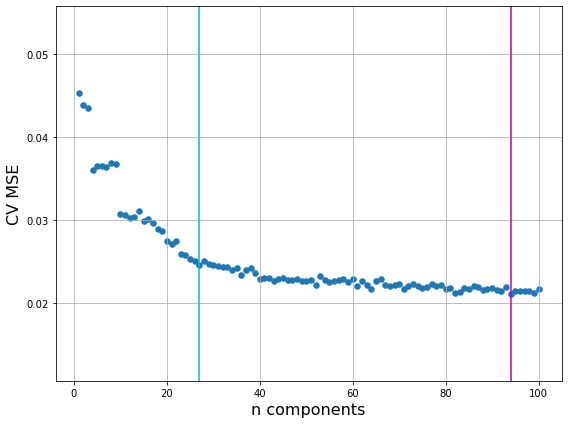

In [55]:
from scipy import stats

n_components = pcr_cv.cv_results_['param_pca__n_components'].data
MSE_scores = pcr_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='pcr',
                                       results=pcr_cv.cv_results_,
                                       param_grid=n_components,
                                       n_splits=10,
                                       neg_mean_squared_error=True)

plt.figure(figsize=(8, 6))
plt.xlabel('n components', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(n_components, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

Magenta vertical line is the minimizer, the cyan vertical line is the "1 Standard Error" selection.

In [56]:
print('pca n_components', x_1se)
print('CV best MSE score:', MSE_scores[x_1se])

pca n_components 27
CV best MSE score: 0.025137893062748183


In [57]:
# print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = True)
# print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = False)

### PCR Refit with One Standard Error Rule

In [58]:
pcr_cv = GridSearchCV(pipe,
                      {'pca__n_components': [x_1se]},
                      scoring='neg_mean_squared_error',
                      cv=10)
pcr_cv.fit(X_train_pcr, y_train)

print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = True)
print_metrics(pcr_cv, X_train_pcr, y_train, X_test_pcr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.8731916312695639
Training MAE 0.10018693173566758
Training RMSE 0.1436452144455646
Out-of-sample R2 0.8519533111086384
Out-of-sample MAE 0.10749971252843406
Out-of-sample RMSE 0.15995854655816963

Metrics for Sale Price:

Training R2 0.8728559019073306
Training MAE 17779.800720708045
Training RMSE 28663.591184398756
Out-of-sample R2 0.8905531211890896
Out-of-sample MAE 17889.766171415493
Out-of-sample RMSE 26097.214632642437


## Ridge Regression

We can choose `alpha_max` so as the value that makes all coefficientes zero, and then construct a log sequence of `alpha` values trending smaller, decreasing the degree of regularization. 

For the case of `Ridge` Regression, alpha value that would make all coefficients zero would be `Inf`, however we can be satisfied with sufficiently small numbers, and work from there.

In [59]:
X_train_rr = X_train_poly
X_test_rr = X_test_poly

print(X_train_rr.shape, X_test_rr.shape)

(1941, 435) (989, 435)


### Determine 'alpha_max'

In [60]:
from sklearn.linear_model import Ridge

alpha_max = 10**5
rr = Ridge(alpha=alpha_max, random_state=88)
rr.fit(X_train_rr, y_train)

/Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.42486e-27): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=100000, random_state=88)

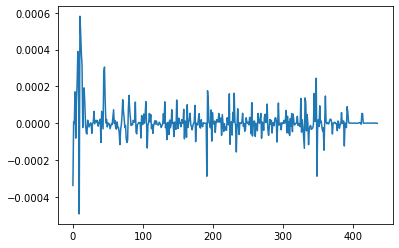

0.0005812671270789974


In [61]:
plt.plot(rr.coef_)
plt.show()
print(max(abs(rr.coef_)))

### Ridge Coefficients vs. Degree of Regularization

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
## Glmnet Rule (alpha = 2N*lambda)
# https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html
    
# alpha_max = 10**5
# n_alpha = 50
# n_obs, n_vars = X_train.shape
# alpha_min_ratio = 0.0001 if n_obs > n_vars else 0.01
# alpha_min_ratio = 10**(-8) # overwrite rule
# alpha_min = alpha_max/alpha_min_ratio
# alpha_grid = np.logspace(np.log10(alpha_min_ratio*alpha_max), np.log10(alpha_max), num=n_alpha, base=10)

In [64]:
alpha_grid = np.logspace(-1, 5, num=50, base=10)
coefs = []

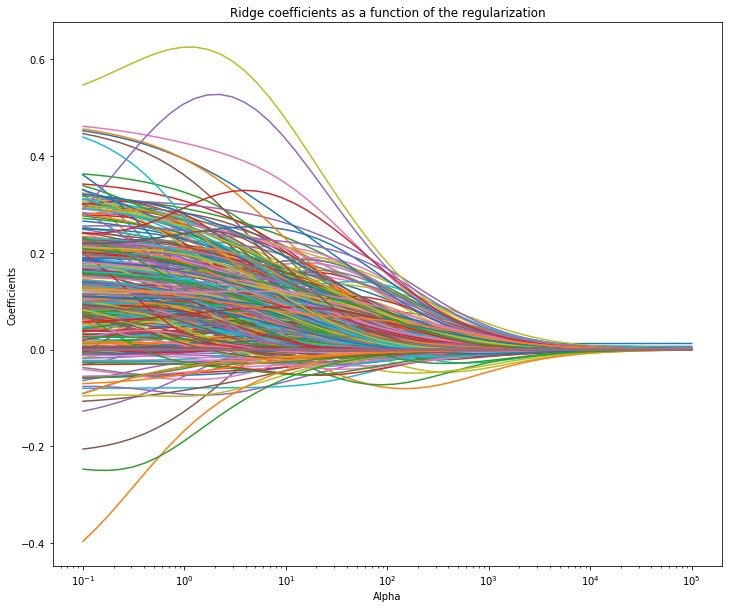

In [65]:
for a in alpha_grid:
    rr = Ridge(alpha=a, fit_intercept=False, random_state=88)
    rr.fit(X_train_rr, y_train)
    coefs.append(rr.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### Ridge Hyper-parameter Tuning

In [66]:
alpha_grid = {'alpha': np.logspace(-1, 5, num=50, base=10)}

rr = Ridge(random_state=88)
rr_cv = GridSearchCV(rr, alpha_grid, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(X_train_rr, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=88),
             param_grid={'alpha': array([1.00000000e-01, 1.32571137e-01, 1.75751062e-01, 2.32995181e-01,
       3.08884360e-01, 4.09491506e-01, 5.42867544e-01, 7.19685673e-01,
       9.54095476e-01, 1.26485522e+00, 1.67683294e+00, 2.22299648e+00,
       2.94705170e+00, 3.90693994e+00, 5.17947468e+00, 6.86648845e+00,
       9.10298178e+00, 1.20679264e+01, 1...
       2.68269580e+02, 3.55648031e+02, 4.71486636e+02, 6.25055193e+02,
       8.28642773e+02, 1.09854114e+03, 1.45634848e+03, 1.93069773e+03,
       2.55954792e+03, 3.39322177e+03, 4.49843267e+03, 5.96362332e+03,
       7.90604321e+03, 1.04811313e+04, 1.38949549e+04, 1.84206997e+04,
       2.44205309e+04, 3.23745754e+04, 4.29193426e+04, 5.68986603e+04,
       7.54312006e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

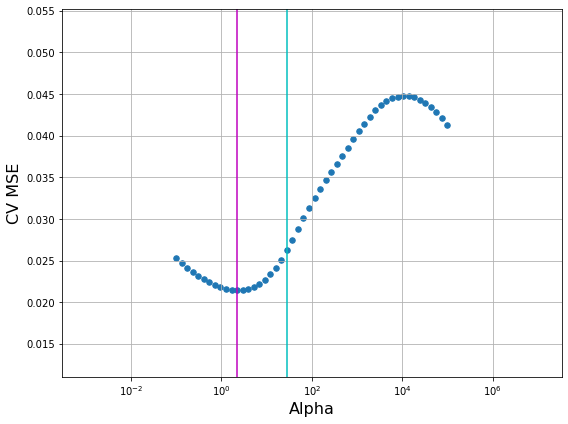

In [67]:
range_alpha = rr_cv.cv_results_['param_alpha'].data
MSE_scores = rr_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='ridge',
                                       results=rr_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [68]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 28.11768697974231


### Ridge Refit with One Standard Error Rule

In [69]:
rr_cv = GridSearchCV(rr, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(X_train_rr, y_train)

print_metrics(rr_cv, X_train_rr, y_train, X_test_rr, y_test, flag_log_sale_price = True)
print_metrics(rr_cv, X_train_rr, y_train, X_test_rr, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9430455577609911
Training MAE 0.06581622618443903
Training RMSE 0.09626779083099493
Out-of-sample R2 0.8963282977543828
Out-of-sample MAE 0.08577852337238172
Out-of-sample RMSE 0.13385611460350957

Metrics for Sale Price:

Training R2 0.9420039324238102
Training MAE 11814.261057252404
Training RMSE 19358.94883249605
Out-of-sample R2 0.928052860290623
Out-of-sample MAE 14161.38202217073
Out-of-sample RMSE 21159.19950401386


## Lasso Regression

In [70]:
X_train_lasso = X_train_poly
X_test_lasso = X_test_poly

print(X_train_lasso.shape, X_test_lasso.shape)

(1941, 435) (989, 435)


### Lasso Coefficients vs. Degree of Regularization

In [71]:
## Glmnet Rule (alpha = 2N*lambda)
# https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html
    
# alpha_max = 10**6
# n_alpha = 50
# n_obs, n_vars = X_train.shape
# alpha_min_ratio = 0.0001 if n_obs > n_vars else 0.01
# alpha_min_ratio = 10**(-8) # overwrite rule
# alpha_min = alpha_max/alpha_min_ratio
# alpha_grid = np.logspace(np.log10(alpha_min_ratio*alpha_max), np.log10(alpha_max), num=n_alpha, base=10)

In [72]:
alphas = np.logspace(-5, 1 , num=50, base=10)
coefs = []

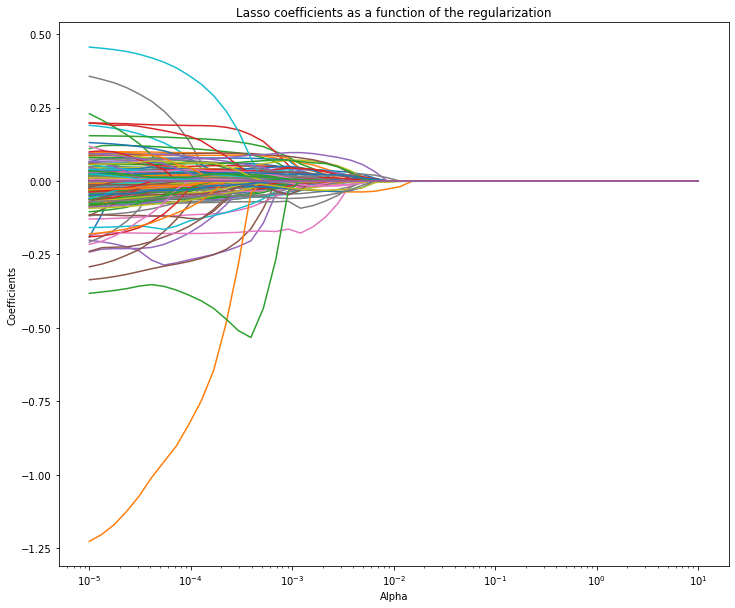

In [73]:
from sklearn.linear_model import Lasso

for a in alphas:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(X_train_lasso, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

### Lasso Hyper-parameter Tuning

In [74]:
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_cv = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train_lasso, y_train)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

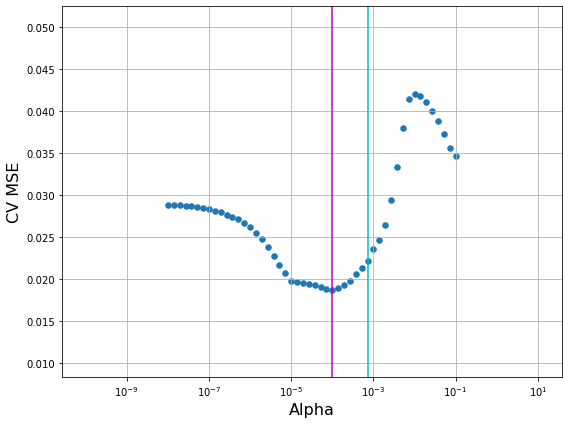

In [75]:
range_alpha = lasso_cv.cv_results_['param_alpha'].data
MSE_scores = lasso_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [76]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.0007196856730011514


### Lasso Refit with One Standard Error Rule

In [77]:
lasso_cv = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train_lasso, y_train)

print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = True)
print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.9364975693820558
Training MAE 0.06908709164770653
Training RMSE 0.10165116923344011
Out-of-sample R2 0.8908668353520391
Out-of-sample MAE 0.08660711960325035
Out-of-sample RMSE 0.1373366578726118

Metrics for Sale Price:

Training R2 0.9364459443231434
Training MAE 12357.55086794246
Training RMSE 20265.351148291247
Out-of-sample R2 0.9231277693649971
Out-of-sample MAE 14367.747748914997
Out-of-sample RMSE 21871.431487174836


### Selected Variables

Let's look at some of the variables selected by lasso

In [78]:
cols = X_train_lasso.columns
coefs = lasso_cv.best_estimator_.coef_
sorted(zip(abs(coefs), cols))[-28:]

[(0.03169823214441575, 'BldgType_1Fam'),
 (0.033007101555888006, 'OverallQual_7'),
 (0.036183882716012604, 'BsmtQual_Ex'),
 (0.03694734040190553, 'ExterQual_Fa'),
 (0.03886522805722207, 'RoofMatl_CompShg'),
 (0.04038638224004549, 'MSZoning_RL'),
 (0.04104900197388538, 'BsmtExposure_Gd'),
 (0.04283286609773662, 'Feedr'),
 (0.04520701794873713, 'OverallQual_4'),
 (0.04839562150828385, 'Artery'),
 (0.048491702168424786, 'MSZoning_FV'),
 (0.04881367550048028, 'Fireplaces_2.0'),
 (0.05090460874203302, 'ExteriorBrkFace'),
 (0.05129303734439255, 'OverallQual_3'),
 (0.05747023303807046, 'SaleCondition_Abnorml'),
 (0.061489448697105716, 'OverallCond_9'),
 (0.0661470936218536, 'GarageCond_TA'),
 (0.07041382497439337, 'OverallCond_4'),
 (0.07189337475914542, 'KitchenQual_Ex'),
 (0.07434911269415494, 'OverallCond_7'),
 (0.07473269218972353, 'OverallQual_8'),
 (0.08471952525846438, 'OverallCond_8'),
 (0.08699178195335656, 'Neighborhood_Crawfor'),
 (0.08927341033845067, 'OverallQual_10'),
 (0.094138

### Recover Naive Least Squares

We can also recover the predictions for the Naive Least Squares model from the fitted Lasso model by using `alpha = 0`.

Simply recalculate the estimator at `alpha = 0`.

In [79]:
# lasso_cv.set_params(param_grid={'alpha':[0]})
# lasso_cv.fit(X_train_lasso, y_train)
# lasso_cv.get_params()

lasso.set_params(alpha=0)
lasso.fit(X_train_lasso, y_train)
lasso.get_params()

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 88,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [80]:
# print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = True)
# print_metrics(lasso_cv, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = False)

print_metrics(lasso, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = True)
print_metrics(lasso, X_train_lasso, y_train, X_test_lasso, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.959942416315093
Training MAE 0.05706589976698839
Training RMSE 0.0807345777908574
Out-of-sample R2 0.875144864275798
Out-of-sample MAE 0.08907564231317436
Out-of-sample RMSE 0.14689645170912677

Metrics for Sale Price:

Training R2 0.9575357754642794
Training MAE 10403.293805466386
Training RMSE 16565.10134110023
Out-of-sample R2 0.9106774949989804
Out-of-sample MAE 14795.94495879233
Out-of-sample RMSE 23576.151518428593


## Random Forests

In [81]:
X_train_rf = X_train_poly
X_test_rf = X_test_poly

In [82]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'max_features': [10, 15, 20, 25],
              'n_estimators': [1000]}

rf = RandomForestRegressor(random_state=88, verbose=0)
rf_cv = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=10)
rf_cv.fit(X_train_rf, y_train)
rf_cv.best_estimator_

RandomForestRegressor(max_features=25, n_estimators=1000, random_state=88)

The best estimator out of the cross-validation is already computed with the right criteria. Here we don't need to use One Standard Error Rule, or anything refitting of the kind

In [83]:
print_metrics(rf_cv, X_train_rf, y_train, X_test_rf, y_test, flag_log_sale_price = True)
print_metrics(rf_cv, X_train_rf, y_train, X_test_rf, y_test, flag_log_sale_price = False)


Metrics for Log(Sale Price):

Training R2 0.98387179436919
Training MAE 0.032977469429260504
Training RMSE 0.05122833372828843
Out-of-sample R2 0.8561032344524293
Out-of-sample MAE 0.09809551623322683
Out-of-sample RMSE 0.15770069817331717

Metrics for Sale Price:

Training R2 0.978312918641231
Training MAE 6171.01505850524
Training RMSE 11838.128578358172
Out-of-sample R2 0.8955618038871814
Out-of-sample MAE 16407.071765162902
Out-of-sample RMSE 25493.070551466004


## Final Comparison

### Comparison Table - Log(Sale Price)

In [84]:
comparison_data = {
    
    'Naive Linear Regression': ['{:.3f}'.format(OSR2(y_train, y_test, nlr.predict(X_test_nlr))),
                                '{:.4f}'.format(RMSE(y_test, nlr.predict(X_test_nlr))),
                                '{:.3f}'.format(MAE(y_test, nlr.predict(X_test_nlr)))],
    
    'Common Sense Linear Regression': ['{:.3f}'.format(OSR2(y_train, y_test, cslr.predict(X_test_cslr))),
                                       '{:.4f}'.format(RMSE(y_test, cslr.predict(X_test_cslr))),
                                       '{:.3f}'.format(MAE(y_test, cslr.predict(X_test_cslr)))],
    
    'Principal Components Regression': ['{:.3f}'.format(OSR2(y_train, y_test, pcr_cv.predict(X_test_pcr))),
                                        '{:.4f}'.format(RMSE(y_test, pcr_cv.predict(X_test_pcr))),
                                        '{:.3f}'.format(MAE(y_test, pcr_cv.predict(X_test_pcr)))],
    
    'Ridge Regression': ['{:.3f}'.format(OSR2(y_train, y_test, rr_cv.predict(X_test_rr))),
                         '{:.4f}'.format(RMSE(y_test, rr_cv.predict(X_test_rr))),
                         '{:.3f}'.format(MAE(y_test, rr_cv.predict(X_test_rr)))],
    
    'Lasso Regression': ['{:.3f}'.format(OSR2(y_train, y_test, lasso_cv.predict(X_test_lasso))),
                         '{:.4f}'.format(RMSE(y_test, lasso_cv.predict(X_test_lasso))),
                         '{:.3f}'.format(MAE(y_test, lasso_cv.predict(X_test_lasso)))],
    
    'Random Forest Regression': ['{:.3f}'.format(OSR2(y_train, y_test, rf_cv.predict(X_test_rf))),
                                 '{:.4f}'.format(RMSE(y_test, rf_cv.predict(X_test_rf))),
                                 '{:.3f}'.format(MAE(y_test, rf_cv.predict(X_test_rf)))]
}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample RMSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Naive Linear Regression,Common Sense Linear Regression,Principal Components Regression,Ridge Regression,Lasso Regression,Random Forest Regression
OSR2,0.451,0.829,0.852,0.896,0.891,0.856
Out-of-sample RMSE,0.3080,0.1718,0.1600,0.1339,0.1373,0.1577
Out-of-sample MAE,0.278,0.120,0.107,0.086,0.087,0.098


### Comparison Table - Sale Price

In [85]:
y_train_exp = y_train.copy().apply(np.exp).reset_index(drop=True)
y_test_exp = y_test.copy().apply(np.exp).reset_index(drop=True)

comparison_data = {
    
    'Naive Linear Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                                     pd.Series(nlr.predict(X_test_nlr)).apply(np.exp))),
                                '{:.4f}'.format(RMSE(y_test_exp,
                                                     pd.Series(nlr.predict(X_test_nlr)).apply(np.exp))),
                                '{:.3f}'.format(MAE(y_test_exp,
                                                    pd.Series(nlr.predict(X_test_nlr)).apply(np.exp)))],
    
    'Common Sense Linear Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                                            pd.Series(cslr.predict(X_test_cslr)).apply(np.exp))),
                                       '{:.4f}'.format(RMSE(y_test_exp,
                                                            pd.Series(cslr.predict(X_test_cslr)).apply(np.exp))),
                                       '{:.3f}'.format(MAE(y_test_exp,
                                                           pd.Series(cslr.predict(X_test_cslr)).apply(np.exp)))],
    
    
    'Principal Components Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                                             pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp))),
                                        '{:.4f}'.format(RMSE(y_test_exp,
                                                             pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp))),
                                        '{:.3f}'.format(MAE(y_test_exp,
                                                            pd.Series(pcr_cv.predict(X_test_pcr)).apply(np.exp)))],
    
    'Ridge Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                              pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp))),
                         '{:.4f}'.format(RMSE(y_test_exp,
                                              pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp))),
                         '{:.3f}'.format(MAE(y_test_exp,
                                             pd.Series(rr_cv.predict(X_test_rr)).apply(np.exp)))],
    
    'Lasso Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                              pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp))),
                         '{:.4f}'.format(RMSE(y_test_exp,
                                              pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp))),
                         '{:.3f}'.format(MAE(y_test_exp,
                                             pd.Series(lasso_cv.predict(X_test_lasso)).apply(np.exp)))],
    
    'Random Forest Regression': ['{:.3f}'.format(OSR2(y_train_exp, y_test_exp,
                                                      pd.Series(rf_cv.predict(X_test_rf)).apply(np.exp))),
                                 '{:.4f}'.format(RMSE(y_test_exp,
                                                      pd.Series(rf_cv.predict(X_test_rf)).apply(np.exp))),
                                 '{:.3f}'.format(MAE(y_test_exp,
                                                     pd.Series(rf_cv.predict(X_test_rf)).apply(np.exp)))]
}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample RMSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Naive Linear Regression,Common Sense Linear Regression,Principal Components Regression,Ridge Regression,Lasso Regression,Random Forest Regression
OSR2,0.566,0.868,0.891,0.928,0.923,0.896
Out-of-sample RMSE,51981.2250,28704.2380,26097.2146,21159.1995,21871.4315,25493.0706
Out-of-sample MAE,43255.773,20212.323,17889.766,14161.382,14367.748,16407.072


# References
- [1] [Examples Ridge Regression](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)
- [2] [Revert dummy encoding, Dec, 2015](https://github.com/pandas-dev/pandas/issues/8745)
- [3] [Best alpha max, Oct, 2019](https://github.com/scikit-learn-contrib/lightning/issues/84)
- [4] [Find nearest, Apr, 2010](https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array)


### EXTRA

In [86]:
# def best_alpha_index(results):
    
#     K = len([x for x in list(results.keys()) if x.startswith('split')])
#     alpha_range = results['param_ridge__alpha'].data
    
#     mean_per_alpha = pd.Series(results['mean_test_score'], index = alpha_range)
#     std_per_alpha  = pd.Series(results['std_test_score'], index = alpha_range)
#     sem_per_alpha  = std_per_alpha / np.sqrt(K)

#     max_score  = mean_per_alpha.max()
#     sem        = sem_per_alpha[mean_per_alpha.idxmax()]
#     best_alpha = mean_per_alpha[mean_per_alpha >= max_score - sem].index.max()
    
#     best_alpha_index = int(np.argwhere(alpha_range == best_alpha)[0])
    
#     return best_alpha_index

# def x_1se_rule(results, n_splits, neg_mean_squared_error=True):
    
#     assert neg_mean_squared_error == True # this function is defined specifically for neg_mean_squared_error
    
#     range_x = results['param_'+list(param_grid.keys())[0]].data
#     std_per_x  = pd.Series(results['std_test_score'], index = range_x)
#     sem_per_x  = std_per_x/np.sqrt(n_splits)
#     mean_per_x = pd.Series(results['mean_test_score'], index = range_x)
    
#     if (neg_mean_squared_error == True):
        
#         mean_per_x = mean_per_x*(-1)
#         sem = sem_per_x[mean_per_x.idxmin()]
#         x_1se = mean_per_x[mean_per_x <= min(mean_per_x) + sem].index.min()
#         x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
        
#     else:
#         sem = sem_per_x[mean_per_x.idxmax()]
#         x_1se = mean_per_x[mean_per_x >= max(mean_per_x) - sem].index.min()
#         x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
    
#     return x_1se_idx


# x_range = results['param_'+list(param_grid.keys())[0]].data
# std_per_x  = pd.Series(results['std_test_score'], index = x_range)
# sem_per_x  = std_per_x/np.sqrt(10)
    
# mean_per_x = pd.Series(results['mean_test_score'], index = x_range)

# mean_per_x = mean_per_x*(-1)

# min_score = mean_per_x.min()
# sem = sem_per_x[mean_per_x.idxmin()]
# print('min_score + sem',min_score + sem)

# x_1se = mean_per_x[mean_per_x >= min_score + sem].index.max()
# x_1se_idx = np.argwhere(x_range == x_1se)
# x_1se_idx


# MSE_se_optionA = np.std(MSE_scores)
# MSE_se_optionB = np.mean(MSE_std)/np.sqrt(10)
# MSE_se_optionC = np.mean(MSE_std/np.sqrt(10))

# print(MSE_se_optionA, MSE_se_optionB, MSE_se_optionC)

In [87]:
# In previous part, we took advantage of monotonoicty of the `n_components` vs `MSE` graph to find a suitable `x_minimizer` and move towards the `x_1se_rule`. For our next graph, the plot is not necessarily monotonic, therefore we define a help function `find_nearest` to find the `alpha`s of interest.

# def find_nearest(array, value): 
    
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
    
#     return array[idx]

In [88]:
# # If we wanted to decode these columns back into their original form, we could define a `reverse_dummy` function:

# ## DECODING FUNCTION

# # No need to understand this function. Converts dummies back. Reference [2]
    
# from collections import defaultdict

# def reverse_dummy(df_dummies):
    
#     pos = defaultdict(list)
#     vals = defaultdict(list)

#     for i, c in enumerate(df_dummies.columns):
#         if "_" in c:
#             k, v = c.split("_", 1)
#             pos[k].append(i)
#             vals[k].append(v)
#         else:
#             pos["_"].append(i)

#     df = pd.DataFrame({k: pd.Categorical.from_codes(
#                               np.argmax(df_dummies.iloc[:, pos[k]].values, axis=1),
#                               vals[k])
#                       for k in vals})

#     df[df_dummies.columns[pos["_"]]] = df_dummies.iloc[:, pos["_"]]
    
#     return df

# common_sense_less_numeric = sorted(list(set(common_sense_cols) - set(to_numeric_cols)))

# X_train_csln = X_train[common_sense_less_numeric]
# X_train_tnc = reverse_dummy(X_train[to_numeric_cols]).astype('float')
# X_train_tnc.index = X_train.index
# X_train_cslr = pd.concat([X_train_csln, X_train_tnc], axis=1)

# X_test_csln = X_test[common_sense_less_numeric]
# X_test_tnc = reverse_dummy(X_test[to_numeric_cols]).astype('float')
# X_test_tnc.index = X_test.index
# X_test_cslr = pd.concat([X_test_csln, X_test_tnc], axis=1)

In [89]:
# `sklearn` also provides packages that can perform cross-validation directly within the regression algorithm and it's more efficient than the separated search. Optional arguments are `n_alphas` or `alphas_`; if none given the model assumes `n_alphas = 100` as default and computes de interval automatically.

# from sklearn.linear_model import LassoCV

# alpha_grid = np.logspace(-5, 1, num=50, base=10)

# lasso_cv = LassoCV(alphas=alpha_grid, random_state=88, cv=10)
# lasso_cv.fit(X_train_lasso, y_train)s

In [90]:
# ## Glmnet Rule
# alpha_max = 10**6
# n_alpha = 50
# n_obs, n_vars = X_train.shape
# alpha_min_ratio = 0.0001 if n_obs > n_vars else 0.01
# alpha_min_ratio = 10**(-8)
# alpha_min = alpha_max/alpha_min_ratio
# alpha_grid = np.logspace(np.log10(alpha_min_ratio*alpha_max), np.log10(alpha_max), num=n_alpha, base=10)

In [91]:
# ## Auxiliary function

# import time

# def calc_time(run_operation):
    
#     tic = time.time()
#     res = run_operation
#     toc = time.time()
#     delta = toc-tic
    
# #     return res, 'time: '+str(float(delta))
#     return delta

# def create_polynomial_features(df, n_degree):
    
#     new_df = df.copy()

#     for i in range(2, n_degree+1):
        
#         tmp = df.pow(i)
        
#         affix = '_pow_'+str(i)
#         tmp.columns = list(map(lambda x: x + affix, df.columns))
        
#         new_df = pd.concat([new_df, tmp], axis=1)
    
#     return new_df

In [92]:
# from sklearn.preprocessing import PolynomialFeatures

# n_degree = 5
# poly_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
#              'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
#              'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'MiscVal', 'YearsSince1950Built',
#              'YearsSince1950Remod', 'YearsSince1950GarageBuilt']

# poly = PolynomialFeatures(degree=n_degree, interaction_only=False)
# X_train_poly_cols = poly.fit_transform(X_train[poly_cols])
# X_test_poly_cols = poly.fit_transform(X_test[poly_cols])

# print(X_train_poly_cols.shape, y_train.shape, X_test_poly_cols.shape, y_test.shape)

In [93]:
# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(X_train_poly, y_train)
# reg.score(X_train_poly, y_train)

In [94]:
# from scipy import stats

# n_components = pcr_cv.cv_results_['param_pca__n_components'].data
# MSE_scores = pcr_cv.cv_results_['mean_test_score']*(-1)
# MSE_std = pcr_cv.cv_results_['std_test_score']

# MSE_se = np.mean(MSE_std)/np.sqrt(10)
# MSE_1se_rule = min(MSE_scores)+MSE_se
# x_1se_rule = np.where(MSE_scores <= MSE_1se_rule)[0][0]

# plt.figure(figsize=(8, 6))
# plt.xlabel('n components', fontsize=16)
# plt.ylabel('CV MSE', fontsize=16)
# plt.scatter(n_components, MSE_scores, s=30)
# plt.axvline(x=x_minimizer, color='m')
# plt.axvline(x=x_1se_rule, color='c')
# plt.grid(True, which='both')

# plt.tight_layout()
# plt.show()

In [95]:
# alpha_grid = lasso_cv.alphas_
# MSE_scores = np.mean(lasso_cv.mse_path_, axis=1)

# x_minimizer = alpha_grid[np.argmin(MSE_scores)]
# MSE_se = stats.sem(MSE_scores)

# MSE_1se_rule = min(MSE_scores)+stats.sem(MSE_scores)
# MSE_nearest = find_nearest(MSE_scores, MSE_1se_rule)
# idx_nearest = np.where(MSE_scores == MSE_nearest)[0][0]
# x_1se_rule = alpha_grid[idx_nearest]

# plt.figure(figsize=(8, 6))
# ax = plt.gca()
# ax.set_xscale('log')
# plt.xlabel(a'Alpha', fontsize=16)
# plt.ylabel('CV MSE', fontsize=16)
# plt.scatter(alpha_grid, MSE_scores, s=30)
# plt.axvline(x=x_minimizer, color='m')
# plt.axvline(x=x_1se_rule, color='c')
# plt.grid(True, which='both')

# plt.tight_layout()
# plt.show()s

In [96]:
# # PLOT THE PCA SPECTRUM (EXPLAINED VARIANCE)

# plt.figure(figsize=(8, 6))
# plt.plot(np.arange(1, pcr_cv.best_estimator_.named_steps['pca'].n_components_ + 1),
#          pcr_cv.best_estimator_.named_steps['pca'].explained_variance_ratio_,
#          '+', linewidth=2)

# plt.ylabel('PCA explained variance ratio')
# plt.xlabel('n_components')
# plt.xlim(-1, 70)
# plt.tight_layout()
# plt.show()